### GeoSphere website plots




science examples


In [10]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
from numba import njit
import importlib
import copy
import locale

#Plotly imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px


from sunpy.time import parse_time

#import geosphere colors
import colors as c


#import heliocats files
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

###

outputdir='results/geosphere_web/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)


os.system('jupyter nbconvert --to script geosphere_webplots.ipynb')    


def add_logo(location):
    logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
    newax = fig.add_axes(location, anchor='NE', zorder=1)
    newax.imshow(logo)
    newax.axis('off')

    
    
    

system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geosphere_webplots.ipynb to script
[NbConvertApp] Writing 15056 bytes to geosphere_webplots.py


Tabellenüberschrift

Source Sans Pro Bold, 30 Px, Farbe: #052E37, RGB (5/46/55)

2) Achsenbeschriftung

Source Sans Pro Bold, 16 Px, Farbe: #052E37, RGB (5/46/55)

3) Copyrightvermerk

Source Sans Pro Bold, 16 Px, Farbe: #9AACAF, RGB (154/172/175)

wenn möglich rechts unten (kein Logo!)

4) Rahmen
Breite: 1 Px, Farbe: #9AACAF, RGB (154/172/175)
Wenn Grafiken im Content eingesetzt werden und sie auf weiß auslaufen, sollte man einen entsprechenden Rahmen zur opti- schen Begrenzung anlegen. Wenn sie in einem Slider zum Ein- satz kommen, kann dieser Rahmen auch weggelassen werden, da der Slider bereits selbst durch einen Rahmen begrenzt ist.

5) Achsen
Breite: 1 Px, Farbe: #052E37, RGB (5/46/55)

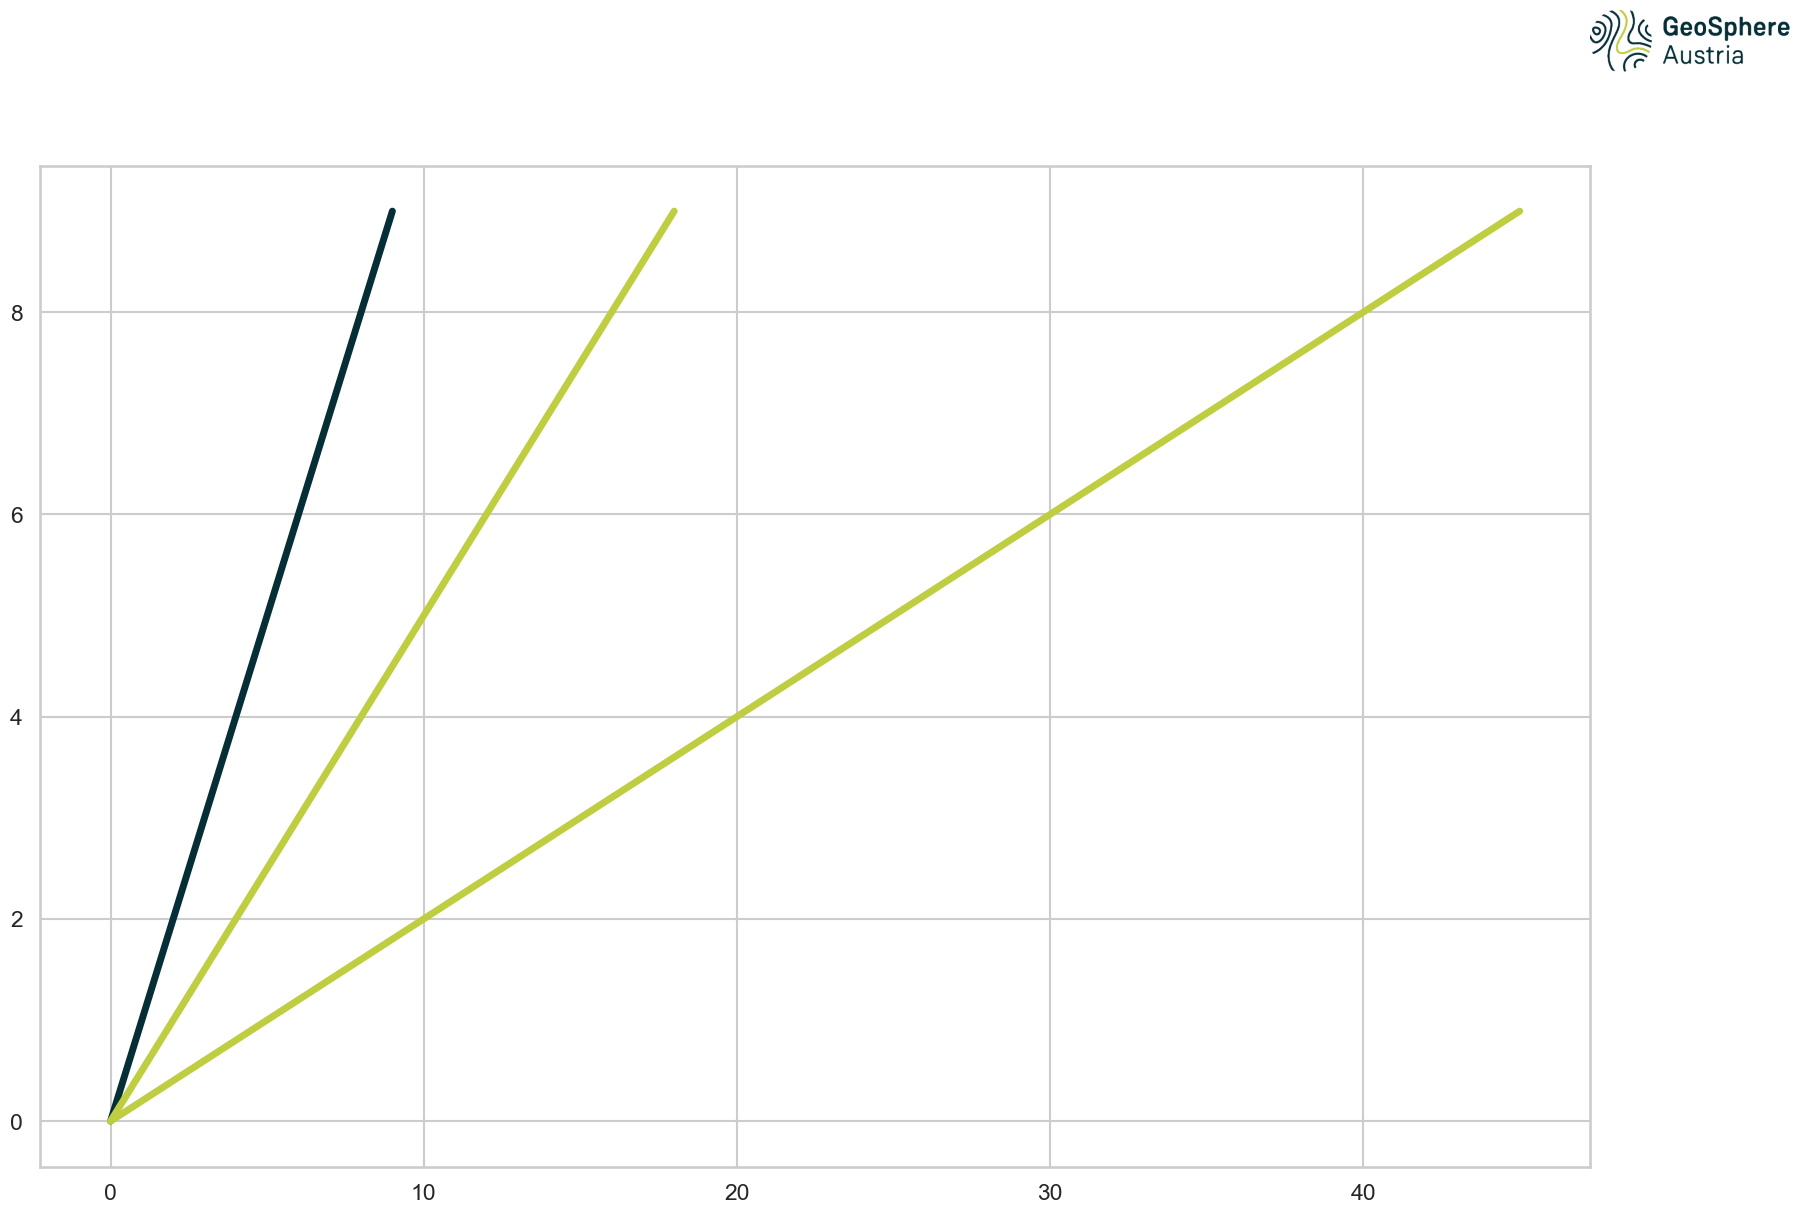

In [14]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax1=plt.subplots(1,figsize=(20,13),dpi=100)


ax1.plot(np.arange(10),np.arange(10),markersize=5,color=c.geo_green,lw=5)
ax1.plot(np.arange(10)*2,np.arange(10),markersize=5,color=c.geo_lime,lw=5)
ax1.plot(np.arange(10)*5,np.arange(10),markersize=5,color=c.geo_ocher,lw=5)


add_logo([0.9,0.9,0.1,0.1])

#plt.tight_layout()

plt.savefig(outputdir+'test.png')

In [23]:
#load icmecat as pandas dataframe
file='icmecat/HELIO4CAST_ICMECAT_v22_pandas.p'
[ic_pandas,h,p]=pickle.load( open(file, 'rb'))   

ic=ic_pandas

ic_mo_start_time_num=parse_time(ic.mo_start_time).plot_date

#get indices for each target
imes=np.where(ic.sc_insitu=='MESSENGER')[0]
ivex=np.where(ic.sc_insitu=='VEX')[0]
iwin=np.where(ic.sc_insitu=='Wind')[0]
imav=np.where(ic.sc_insitu=='MAVEN')[0]
ijun=np.where(ic.sc_insitu=='Juno')[0]

ista=np.where(ic.sc_insitu=='STEREO-A')[0]
istb=np.where(ic.sc_insitu=='STEREO-B')[0]
ipsp=np.where(ic.sc_insitu=='PSP')[0]
isol=np.where(ic.sc_insitu=='SolarOrbiter')[0]
ibep=np.where(ic.sc_insitu=='BepiColombo')[0]
iuly=np.where(ic.sc_insitu=='ULYSSES')[0]

## ICME fields english

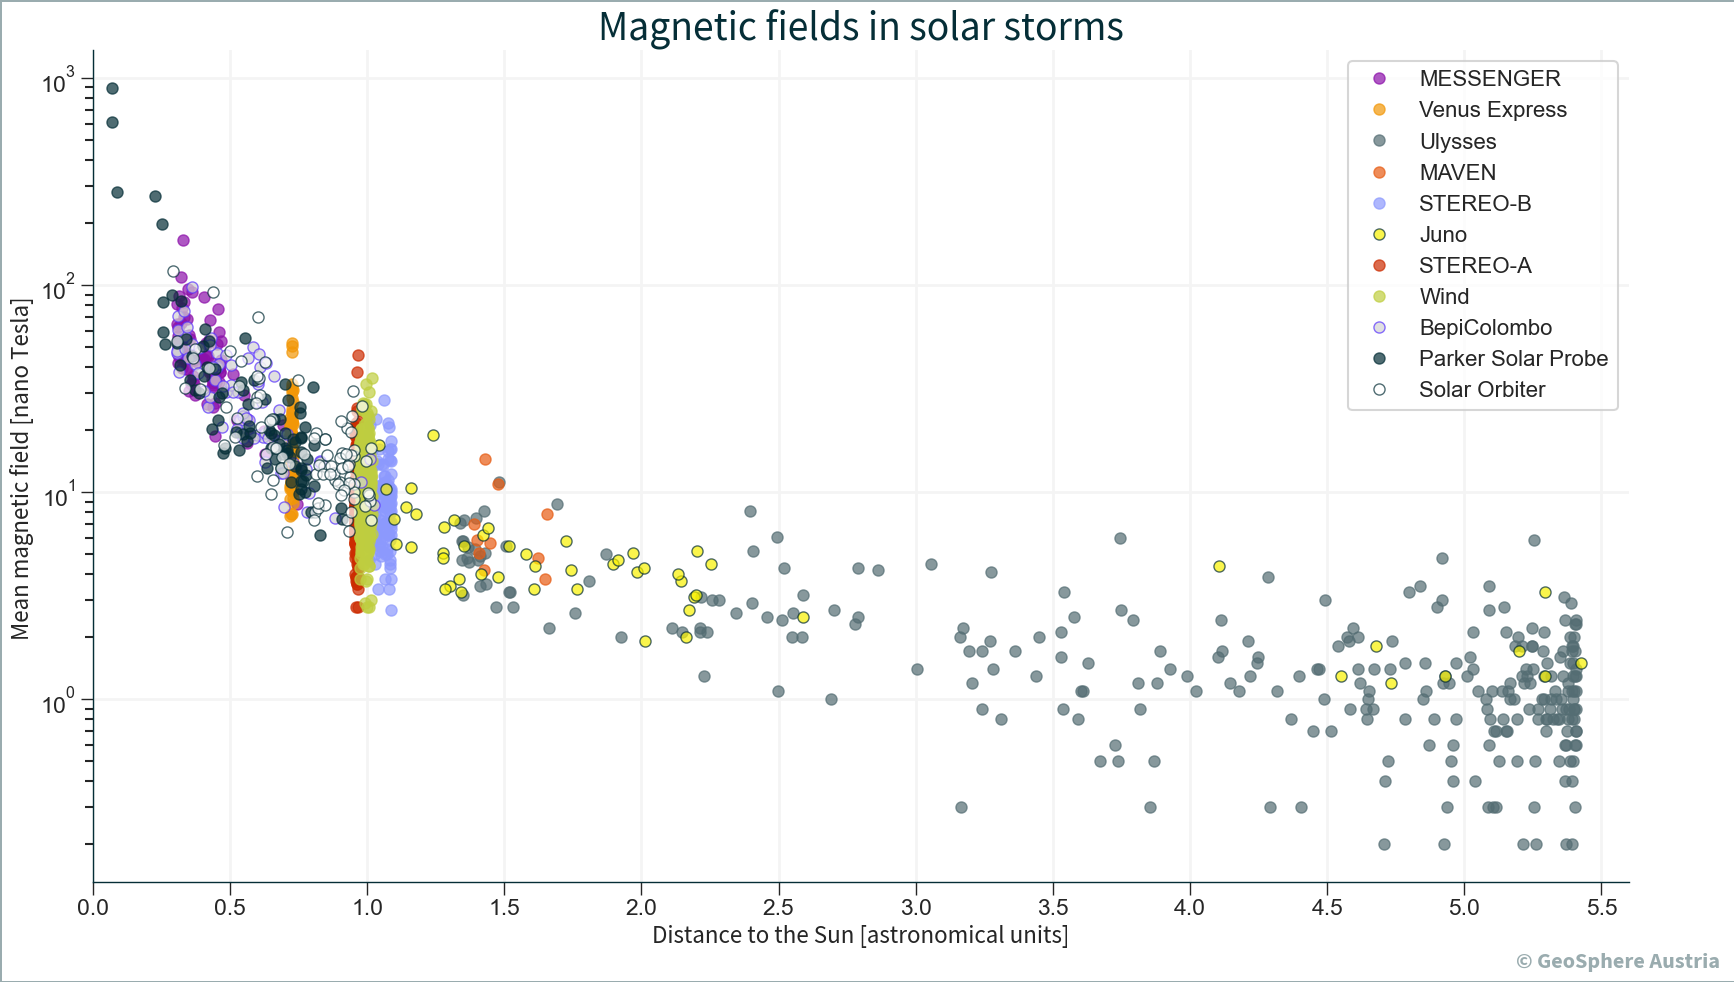

In [120]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_style("ticks")

###############################################################################
fig=plt.figure(3,figsize=(19.2,10.8),dpi=100,edgecolor=c.geo_green)

#########################################################################

#ax3=plt.subplot(111)
ax3 = plt.axes([0.1, 0.13, 0.8, 0.77])
# 10% from left, 20% from bottom, 80% width, 60% height


ms=8
ax3.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c=c.geo_magenta , alpha=al,ms=ms,label='MESSENGER')
ax3.plot(ic.mo_sc_heliodistance[ivex],ic.mo_bmean[ivex],'o',c=c.geo_orange , alpha=al,ms=ms,label='Venus Express')
ax3.plot(ic.mo_sc_heliodistance[iuly],ic.mo_bmean[iuly],'o',c=c.geo_green2, alpha=al,ms=ms, label='Ulysses')
ax3.plot(ic.mo_sc_heliodistance[imav],ic.mo_bmean[imav],'o',c=c.geo_orangered , alpha=al,ms=ms, label='MAVEN')
ax3.plot(ic.mo_sc_heliodistance[istb],ic.mo_bmean[istb],'o',c=c.geo_cornflowerblue, alpha=al,ms=ms, label='STEREO-B')
ax3.plot(ic.mo_sc_heliodistance[ijun],ic.mo_bmean[ijun],'o', c=c.geo_green ,markerfacecolor=c.geo_yellow, alpha=al,ms=ms, label='Juno')

ax3.plot(ic.mo_sc_heliodistance[ista],ic.mo_bmean[ista],'o',c=c.geo_red, alpha=al,ms=ms, label='STEREO-A')
ax3.plot(ic.mo_sc_heliodistance[iwin],ic.mo_bmean[iwin],'o',c=c.geo_lime, alpha=al,ms=ms,label='Wind')
ax3.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c=c.geo_lilac,markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax3.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c=c.geo_green, alpha=al,ms=ms, label='Parker Solar Probe',zorder=3)
ax3.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c=c.geo_green, markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter',zorder=3)



ax3.set_yscale('log')
ax3.set_ylabel('Mean magnetic field [nano Tesla] ',fontname='Source Sans Pro',fontsize=18)
#ax3.set_yticks(color=c.geo_axes_title,fontname='Source Sans Pro',fontsize=18)

ax3.set_xticks(np.arange(0,6,0.5),color=c.geo_axes_title,fontname='Source Sans Pro',fontsize=18)
ax3.set_xlabel('Distance to the Sun [astronomical units]',fontname='Source Sans Pro',fontsize=18)
ax3.set_xlim([0,5.6])

ax3.legend(loc=1,fontsize=16)

plt.title('Magnetic fields in solar storms',fontname='Source Sans Pro',fontsize=30,color=c.geo_axes_title )



#Logo
#logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
#newax = fig.add_axes([0.89,0.92,0.08,0.08], anchor='NE', zorder=1)
#newax.imshow(logo)
#newax.axis('off')

#grid lighter

ax3.grid(alpha=1.0,color=c.geo_raster,lw=2)

sns.despine()
ax3.spines['left'].set_color(c.geo_axes_title)     # Left spine color
ax3.spines['bottom'].set_color(c.geo_axes_title) # Bottom spine color
ax3.spines['left'].set_linewidth(1) 
ax3.spines['bottom'].set_linewidth(1) 
ax3.tick_params(axis='both', width=1) 

# Add a border around the entire figure
fig.patch.set_linewidth(1)      # Set the width of the border
fig.patch.set_edgecolor(c.geo_copyright) # Set the color of the border


plt.figtext(0.95,0.05,'© GeoSphere Austria ', ha='right',fontsize=16,color=c.geo_copyright,fontweight='bold', fontname='Source Sans Pro')

#plt.show()
plt.savefig(outputdir+'solar_storm_fields_en.png', dpi=150)

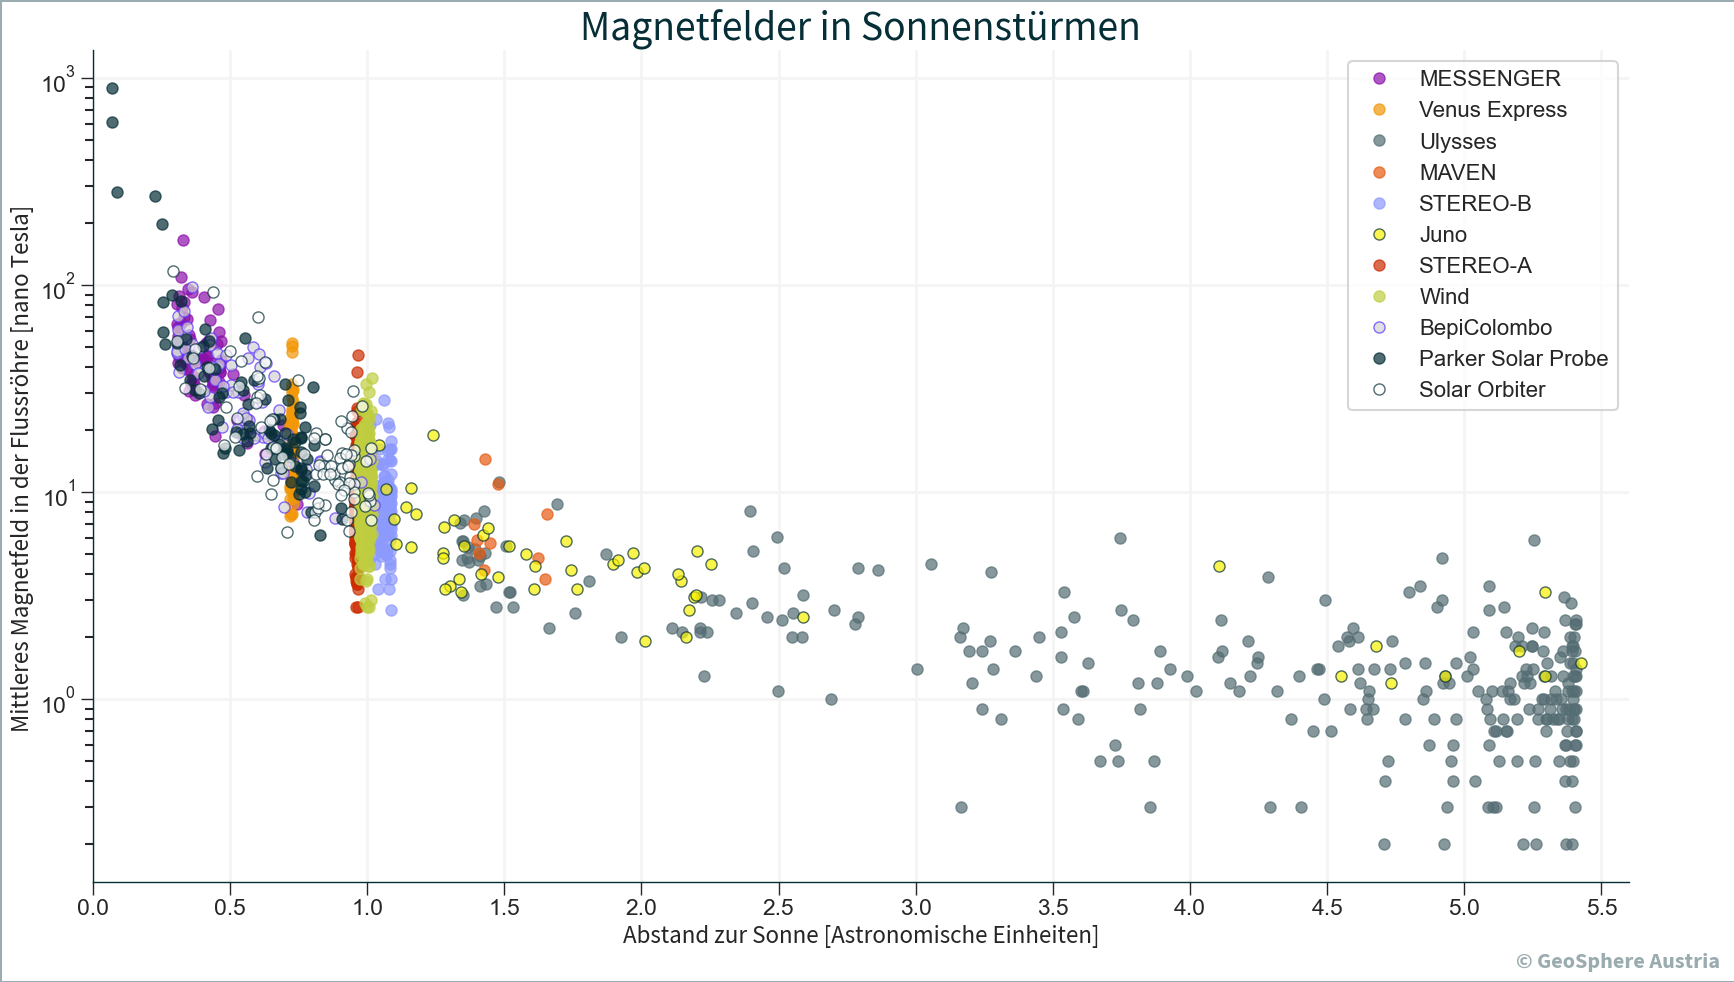

In [121]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_style("ticks")

###############################################################################
fig=plt.figure(3,figsize=(19.2,10.8),dpi=100,edgecolor=c.geo_green)

#########################################################################

#ax3=plt.subplot(111)
ax3 = plt.axes([0.1, 0.13, 0.8, 0.77])
# 10% from left, 20% from bottom, 80% width, 60% height


#original colors

ms=10
#ax3.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
#ax3.plot(ic.mo_sc_heliodistance[ivex],ic.mo_bmean[ivex],'o',c='orange', alpha=al,ms=ms,label='Venus Express')
#ax3.plot(ic.mo_sc_heliodistance[iuly],ic.mo_bmean[iuly],'o',c='chocolate', alpha=al,ms=ms, label='Ulysses')
#ax3.plot(ic.mo_sc_heliodistance[imav],ic.mo_bmean[imav],'o',c='orangered', alpha=al,ms=ms, label='MAVEN')
#ax3.plot(ic.mo_sc_heliodistance[istb],ic.mo_bmean[istb],'o',c='royalblue', alpha=al,ms=ms, label='STEREO-B')
#ax3.plot(ic.mo_sc_heliodistance[ijun],ic.mo_bmean[ijun],'o', c='black',markerfacecolor='yellow', alpha=al,ms=ms, label='Juno')

#ax3.plot(ic.mo_sc_heliodistance[ista],ic.mo_bmean[ista],'o',c='red', alpha=al,ms=ms, label='STEREO-A')
#ax3.plot(ic.mo_sc_heliodistance[iwin],ic.mo_bmean[iwin],'o',c='mediumseagreen', alpha=al,ms=ms,label='Wind')
#ax3.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
#ax3.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe',zorder=3)
#ax3.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter',zorder=3)

ms=8
ax3.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c=c.geo_magenta , alpha=al,ms=ms,label='MESSENGER')
ax3.plot(ic.mo_sc_heliodistance[ivex],ic.mo_bmean[ivex],'o',c=c.geo_orange , alpha=al,ms=ms,label='Venus Express')
ax3.plot(ic.mo_sc_heliodistance[iuly],ic.mo_bmean[iuly],'o',c=c.geo_green2, alpha=al,ms=ms, label='Ulysses')
ax3.plot(ic.mo_sc_heliodistance[imav],ic.mo_bmean[imav],'o',c=c.geo_orangered , alpha=al,ms=ms, label='MAVEN')
ax3.plot(ic.mo_sc_heliodistance[istb],ic.mo_bmean[istb],'o',c=c.geo_cornflowerblue, alpha=al,ms=ms, label='STEREO-B')
ax3.plot(ic.mo_sc_heliodistance[ijun],ic.mo_bmean[ijun],'o', c=c.geo_green ,markerfacecolor=c.geo_yellow, alpha=al,ms=ms, label='Juno')

ax3.plot(ic.mo_sc_heliodistance[ista],ic.mo_bmean[ista],'o',c=c.geo_red, alpha=al,ms=ms, label='STEREO-A')
ax3.plot(ic.mo_sc_heliodistance[iwin],ic.mo_bmean[iwin],'o',c=c.geo_lime, alpha=al,ms=ms,label='Wind')
ax3.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c=c.geo_lilac,markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax3.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c=c.geo_green, alpha=al,ms=ms, label='Parker Solar Probe',zorder=3)
ax3.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c=c.geo_green, markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter',zorder=3)




ax3.set_yscale('log')
ax3.set_ylabel('Mittleres Magnetfeld in der Flussröhre [nano Tesla] ',fontname='Source Sans Pro',fontsize=18)
#ax3.set_xticklabel(color=c.geo_axes_title,fontname='Source Sans Pro',fontsize=30)

ax3.set_xticks(np.arange(0,6,0.5),color=c.geo_axes_title,fontname='Source Sans Pro',fontsize=18)
ax3.set_xlabel('Abstand zur Sonne [Astronomische Einheiten]',fontname='Source Sans Pro',fontsize=18)
ax3.set_xlim([0,5.6])

ax3.legend(loc=1,fontsize=16)

plt.title('Magnetfelder in Sonnenstürmen',fontname='Source Sans Pro',fontsize=30,color=c.geo_axes_title )


#Logo
#logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
#newax = fig.add_axes([0.89,0.92,0.08,0.08], anchor='NE', zorder=1)
#newax.imshow(logo)
#newax.axis('off')

#grid lighter

ax3.grid(alpha=1.0,color=c.geo_raster,lw=2)

sns.despine()
ax3.spines['left'].set_color(c.geo_axes_title)     # Left spine color
ax3.spines['bottom'].set_color(c.geo_axes_title) # Bottom spine color
ax3.spines['left'].set_linewidth(1) 
ax3.spines['bottom'].set_linewidth(1) 
ax3.tick_params(axis='both', width=1) 

# Add a border around the entire figure
fig.patch.set_linewidth(1)      # Set the width of the border
fig.patch.set_edgecolor(c.geo_copyright) # Set the color of the border


plt.figtext(0.95,0.05,'© GeoSphere Austria ', ha='right',fontsize=16,color=c.geo_copyright,fontweight='bold', fontname='Source Sans Pro')

#plt.show()
plt.savefig(outputdir+'solar_storm_fields_de.png', dpi=150)

/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_2964/1152633482.py:19: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



NameError: name 'w_cut' is not defined

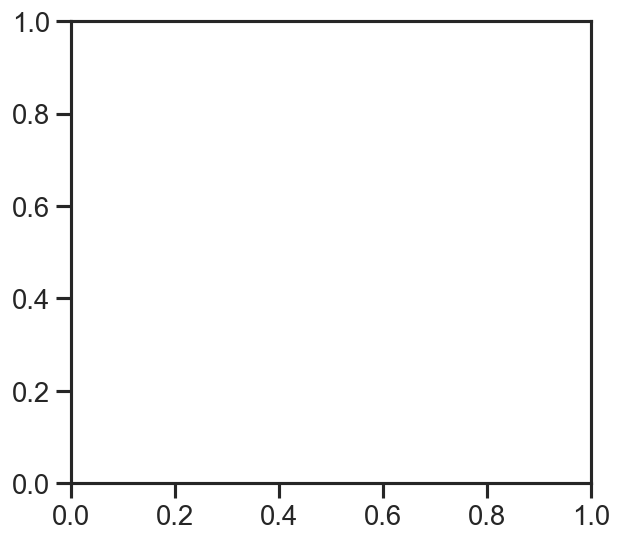

In [95]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_style("ticks")

fig,ax=plt.subplots(1,figsize=(19,5),dpi=120,edgecolor=c.geo_green)

    
#grid with  RGB (244/244/244) and 1px
    
    
#plt.title('Custom Font for Title', fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
#plt.xlabel('X-axis', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'light'})
#plt.ylabel('Y-axis', fontdict={'family': 'monospace', 'size': 12, 'weight': 'normal'})
       

        

##########
ax1=plt.subplot(131)




ax1.axhline(0,color=c.geo_green,linestyle='--',lw=1,alpha=0.5)    

ax1.plot(w_cut.time,w_cut.bt,linestyle='-',color=c.geo_green,lw=2)
ax1.plot(w_cut.time,w_cut.bx,linestyle='-',color=c.geo_red,lw=2)
ax1.plot(w_cut.time,w_cut.by,linestyle='-',color=c.geo_grassgreen,lw=2)
ax1.plot(w_cut.time,w_cut.bz,linestyle='-',color=c.geo_lilac,lw=2)

    
plt.ylabel('B [nT] L1 GSM',fontname='Source Sans Pro')

bplotrange=np.nanmax(w_cut.bt)+10
#set minimum of 20
if bplotrange < 20: bplotrange=20
print(bplotrange)
ax1.set_ylim(-bplotrange,bplotrange)

ax1.xaxis_date()
myformat = mdates.DateFormatter('%H')
ax1.xaxis.set_major_formatter(myformat)

#2nd axis with day
ax12 = ax1.secondary_xaxis(-0.15) 
ax12.xaxis_date()
myformat = mdates.DateFormatter('%a %b %d')
ax12.xaxis.set_major_formatter(myformat)
ax12.xaxis.set_major_locator(mdates.DayLocator()) 

#font and color
plt.xticks(color=c.geo_axes_title,fontname='Source Sans Pro')



#####################################
ax2=plt.subplot(132)

ax2.plot(n_cut.time,n_cut.dst,linestyle='-',color=c.geo_green3,lw=4)
ax2.plot(n_cut.time,n_cut.dst,color=c.geo_green, marker='o',linestyle='none',markersize=10)


dstplotrange_max=np.nanmax(n_cut.dst)+20
dstplotrange_min=np.nanmin(n_cut.dst)-50
#set minimum of -100
if np.min(n_cut.dst) > -100: dstplotrange_min=-100
print(dstplotrange_min, dstplotrange_max)
ax2.set_ylim(dstplotrange_min,dstplotrange_max)

plt.ylabel('Dst [nT]',fontname='Source Sans Pro')


ax2.xaxis_date()
myformat = mdates.DateFormatter('%H')
ax2.xaxis.set_major_formatter(myformat)

#2nd axis with day
ax22 = ax2.secondary_xaxis(-0.15) 
ax22.xaxis_date()
myformat = mdates.DateFormatter('%a %b %d')
ax22.xaxis.set_major_formatter(myformat)
ax22.xaxis.set_major_locator(mdates.DayLocator()) 

#font and color
plt.xticks(color=c.geo_axes_title,fontname='Source Sans Pro')



##################################
ax3=plt.subplot(133)

ax3.plot(w_nc_cut_time,w_nc_cut,color=c.geo_lime2,linestyle='-',lw=1)
ax3.plot(n_ncw_cut_time,n_ncw_cut,color=c.geo_green3,lw=4)
ax3.plot(n_ncw_cut_time,n_ncw_cut,color=c.geo_green,marker='o',markersize=10,linestyle='none')

plt.ylabel('Newell coupling',fontname='Source Sans Pro')


ax3.xaxis_date()
myformat = mdates.DateFormatter('%H')
ax3.xaxis.set_major_formatter(myformat)

#ax3.tick_params(axis='both', direction='in')


#2nd axis with day
ax32 = ax3.secondary_xaxis(-0.15) 
ax32.xaxis_date()
myformat = mdates.DateFormatter('%a %b %d')
ax32.xaxis.set_major_formatter(myformat)
ax32.xaxis.set_major_locator(mdates.DayLocator()) 

#font and color
plt.xticks(color=c.geo_axes_title,fontname='Source Sans Pro')



#for plot range use minute data
ncplotrange=np.nanmax(w_nc_cut)
print(w_nc_cut)
#set minimum of 5
if ncplotrange < 5: ncplotrange=5
print(ncplotrange)
ax3.set_ylim(0,ncplotrange)


#ax3.majorticks_on()
#ax3.minorticks_on()
#ax3.tick_params(axis='both', direction='in', length=10, width=2, colors='black')  # Set ticks inside, change length, width, and color



#LOGO
#logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
#newax = fig.add_axes([0.85,0.88,0.1,0.1], anchor='NE', zorder=1)
#newax.imshow(logo)
#newax.axis('off')


# Convert UTC to CEST
cest_time = utc_time.replace(tzinfo=datetime.timezone.utc).astimezone(ZoneInfo("Europe/Berlin"))
print("CEST time:", cest_time)

plt.figtext(0.06,0.92,'last update: '+str(utc_time)[0:16]+ ' UTC    '+str(cest_time)[10:16]+' CEST', ha='left', fontsize=11, fontname='Source Sans Pro')

plt.figtext(0.5,0.01,'Austrian Space Weather Office    helioforecast.space ', color=c.geo_copyright, ha='center',fontsize=11, fontweight='bold',fontname='Source Sans Pro')
plt.figtext(0.98,0.01,'© GeoSphere Austria ', ha='right',fontsize=11,color=c.geo_copyright,fontweight='bold', fontname='Source Sans Pro')

#plt.figtext(0.03,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')

#ax.set_title("Sample Plot", fontsize=20, fontweight='bold', fontname='Source Sans Pro')


ax1.set_xlim(utc_time-datetime.timedelta(days=quickplotrange),utc_time)
ax2.set_xlim(utc_time-datetime.timedelta(days=quickplotrange),utc_time)
ax3.set_xlim(utc_time-datetime.timedelta(days=quickplotrange),utc_time)


#grid lighter
ax1.grid(alpha=1.0,color=c.geo_raster,lw=2)
ax2.grid(alpha=1.0,color=c.geo_raster,lw=2)
ax3.grid(alpha=1.0,color=c.geo_raster,lw=2)

plt.figtext(0.07,0.01,'― Bx', ha='left', fontsize=15, fontweight='bold',fontname='Source Sans Pro',color=c.geo_red)
plt.figtext(0.10,0.01,'― By', ha='left', fontsize=15, fontweight='bold',fontname='Source Sans Pro',color=c.geo_grassgreen)
plt.figtext(0.13,0.01,'― Bz', ha='left', fontsize=15, fontweight='bold',fontname='Source Sans Pro',color=c.geo_lilac)



#legend for plot B(t)
ax1.plot(w_cut.time,w_cut.bt,linestyle='-',color=c.geo_green,lw=2)
ax1.plot(w_cut.time,w_cut.bx,linestyle='-',color=c.geo_red,lw=2)
ax1.plot(w_cut.time,w_cut.by,linestyle='-',color=c.geo_grassgreen,lw=2)
ax1.plot(w_cut.time,w_cut.bz,linestyle='-',color=c.geo_lavender,lw=2)



sns.despine()

# Add a border around the entire figure
fig.patch.set_linewidth(1)      # Set the width of the border
fig.patch.set_edgecolor(c.geo_copyright) # Set the color of the border

plt.suptitle('Current space weather at Earth',fontweight='bold', fontname='Source Sans Pro',fontsize=20,color=c.geo_axes_title)
plt.tight_layout()



ax1.spines['left'].set_color(c.geo_axes_title)     # Left spine color
ax1.spines['bottom'].set_color(c.geo_axes_title) # Bottom spine color
ax1.spines['left'].set_linewidth(1) 
ax1.spines['bottom'].set_linewidth(1) 
ax12.spines['bottom'].set_linewidth(1) 
ax1.tick_params(axis='both', width=1) 
ax12.tick_params(axis='x', width=1) 


ax2.spines['left'].set_color(c.geo_axes_title)     # Left spine color
ax2.spines['bottom'].set_color(c.geo_axes_title) # Bottom spine color
ax2.spines['left'].set_linewidth(1) 
ax2.spines['bottom'].set_linewidth(1) 
ax22.spines['bottom'].set_linewidth(1) 
ax2.tick_params(axis='both', width=1) 
ax22.tick_params(axis='x', width=1) 


ax3.spines['left'].set_color(c.geo_axes_title)     # Left spine color
ax3.spines['bottom'].set_color(c.geo_axes_title) # Bottom spine color
ax3.spines['left'].set_linewidth(1) 
ax3.spines['bottom'].set_linewidth(1) 
ax32.spines['bottom'].set_linewidth(1) 
ax3.tick_params(axis='both', width=1) 
ax32.tick_params(axis='x', width=1) 


#ax3.spines['bottom'].set_edgecolor(c.geo_axes_title)
#ax32.spines['bottom'].set_edgecolor(c.geo_axes_title)


plt.savefig(outputdir+'geomagnetic_quick.png')

## ICME catalog english